In [3]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"


In [15]:
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
import torch

transform = transforms.ToTensor()

dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

images = []
labels = []

for img, label in dataset:
    if label == 3:  # cat
        images.append(img)
        labels.append(0)
    elif label == 5:  # dog
        images.append(img)
        labels.append(1)

images = torch.stack(images)
labels = torch.tensor(labels)

cat_dog_dataset = TensorDataset(images, labels)

In [21]:
from torch.utils.data import random_split

train_size = int(0.8 * len(cat_dog_dataset))
test_size = len(cat_dog_dataset) - train_size
train_dataset, test_dataset = random_split(cat_dog_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [22]:
from modules.uploadData import *
from modules.getData import *

# zip_data("gd_dataset")
# get_data_from_github("gd_dataset")

In [5]:
NUM_EPOCHS = 20
BATCH_SIZE = 64
HIDDEN_UNITS = 64
LEARNING_RATE = 0.001

In [ ]:
# import torchvision.transforms as transforms

# train_transform = transforms.Compose([
#     transforms.Resize((64, 64)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(15),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#     transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ])

# test_transform = transforms.Compose([
#     transforms.Resize((64, 64)),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ])

In [44]:
# from modules.data_setup import create_dataloaders
# train_dataloader, test_dataloader, class_names = create_dataloaders(
#     train_dir = "data/gd_dataset/test",
#     test_dir = "data/gd_dataset/train",
#     batch_size=32,
#     train_transform=train_transform,
#     test_transform=test_transform
# )

In [27]:
classes = ["cat", "dog"]

In [40]:
from modules.model_builder_CNN2 import SimpleCNN
torch.manual_seed(42)
model_2 = SimpleCNN(input_shape=3, 
    hidden_units=10, 
    output_shape=len(classes)).to(device)

model_2

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)

In [41]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                                 lr=LEARNING_RATE,
                                 weight_decay=1e-4)

In [42]:
from modules import engine
model_2_results = engine.train(
        model=model_2, 
        train_dataloader=train_loader, 
        test_dataloader=test_loader, 
        optimizer=optimizer,
        loss_fn=loss_fn, 
        epochs=NUM_EPOCHS,
        device=device
    )

c:\Users\gabry\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  5%|▌         | 1/20 [00:01<00:27,  1.42s/it]

Epoch: 1  | Train Loss: 0.6958  | Train Accuracy: 0.4800  | Test Loss: 0.6911  | Test Accuracy: 0.5337


 10%|█         | 2/20 [00:02<00:16,  1.07it/s]

Epoch: 2  | Train Loss: 0.6934  | Train Accuracy: 0.5069  | Test Loss: 0.6909  | Test Accuracy: 0.5625


 15%|█▌        | 3/20 [00:02<00:13,  1.26it/s]

Epoch: 3  | Train Loss: 0.6859  | Train Accuracy: 0.5469  | Test Loss: 0.6850  | Test Accuracy: 0.5817


 20%|██        | 4/20 [00:03<00:11,  1.40it/s]

Epoch: 4  | Train Loss: 0.6814  | Train Accuracy: 0.5769  | Test Loss: 0.6812  | Test Accuracy: 0.6082


 25%|██▌       | 5/20 [00:03<00:10,  1.49it/s]

Epoch: 5  | Train Loss: 0.6742  | Train Accuracy: 0.6081  | Test Loss: 0.6803  | Test Accuracy: 0.5769


 30%|███       | 6/20 [00:04<00:09,  1.52it/s]

Epoch: 6  | Train Loss: 0.6652  | Train Accuracy: 0.6244  | Test Loss: 0.6701  | Test Accuracy: 0.6370


 35%|███▌      | 7/20 [00:05<00:09,  1.44it/s]

Epoch: 7  | Train Loss: 0.6568  | Train Accuracy: 0.6456  | Test Loss: 0.6737  | Test Accuracy: 0.5841


 40%|████      | 8/20 [00:05<00:08,  1.44it/s]

Epoch: 8  | Train Loss: 0.6543  | Train Accuracy: 0.6375  | Test Loss: 0.6652  | Test Accuracy: 0.6562


 45%|████▌     | 9/20 [00:06<00:07,  1.47it/s]

Epoch: 9  | Train Loss: 0.6363  | Train Accuracy: 0.6506  | Test Loss: 0.6714  | Test Accuracy: 0.6178


 50%|█████     | 10/20 [00:07<00:06,  1.54it/s]

Epoch: 10  | Train Loss: 0.6368  | Train Accuracy: 0.6594  | Test Loss: 0.6764  | Test Accuracy: 0.6202


 55%|█████▌    | 11/20 [00:07<00:05,  1.57it/s]

Epoch: 11  | Train Loss: 0.6341  | Train Accuracy: 0.6506  | Test Loss: 0.6568  | Test Accuracy: 0.6731


 60%|██████    | 12/20 [00:08<00:05,  1.59it/s]

Epoch: 12  | Train Loss: 0.6198  | Train Accuracy: 0.6669  | Test Loss: 0.6637  | Test Accuracy: 0.6130


 65%|██████▌   | 13/20 [00:08<00:04,  1.59it/s]

Epoch: 13  | Train Loss: 0.6168  | Train Accuracy: 0.6713  | Test Loss: 0.6580  | Test Accuracy: 0.6755


 70%|███████   | 14/20 [00:09<00:03,  1.55it/s]

Epoch: 14  | Train Loss: 0.6212  | Train Accuracy: 0.6706  | Test Loss: 0.6519  | Test Accuracy: 0.6803


 75%|███████▌  | 15/20 [00:10<00:03,  1.53it/s]

Epoch: 15  | Train Loss: 0.6068  | Train Accuracy: 0.6925  | Test Loss: 0.6509  | Test Accuracy: 0.6562


 80%|████████  | 16/20 [00:10<00:02,  1.54it/s]

Epoch: 16  | Train Loss: 0.5946  | Train Accuracy: 0.7013  | Test Loss: 0.6481  | Test Accuracy: 0.6755


 85%|████████▌ | 17/20 [00:11<00:01,  1.55it/s]

Epoch: 17  | Train Loss: 0.5913  | Train Accuracy: 0.7013  | Test Loss: 0.6479  | Test Accuracy: 0.6659


 90%|█████████ | 18/20 [00:12<00:01,  1.53it/s]

Epoch: 18  | Train Loss: 0.5903  | Train Accuracy: 0.6987  | Test Loss: 0.6551  | Test Accuracy: 0.6490


 95%|█████████▌| 19/20 [00:12<00:00,  1.58it/s]

Epoch: 19  | Train Loss: 0.5780  | Train Accuracy: 0.7044  | Test Loss: 0.6619  | Test Accuracy: 0.6803


100%|██████████| 20/20 [00:13<00:00,  1.48it/s]

Epoch: 20  | Train Loss: 0.5816  | Train Accuracy: 0.7113  | Test Loss: 0.6448  | Test Accuracy: 0.6322


In [ ]:
# from modules.utils import save_model

# save_model(
#     model=model_2, 
#     target_directory="models", 
#     model_name="model_2_SimpleCNN.pth",
#     )

Saving model to models\model_2_SimpleCNN.pth


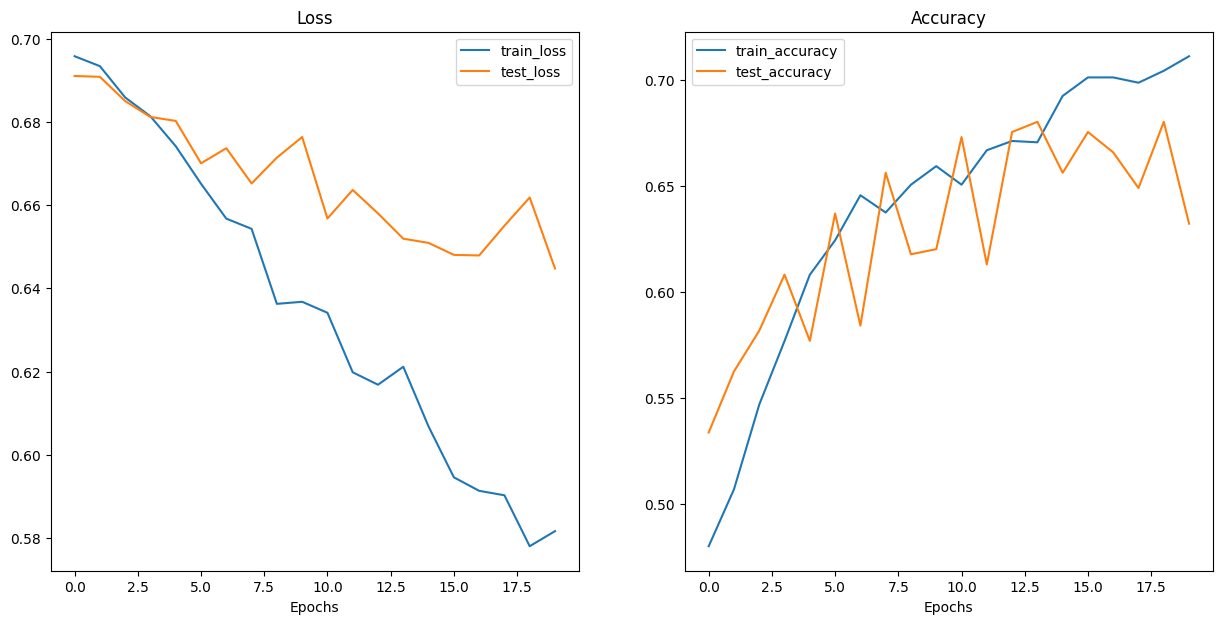

In [43]:
from modules.plots import plot_loss_curves


plot_loss_curves(model_2_results)

In [57]:
from modules.plots import pred_and_plot_image
import torch

custom_image_path1 = "data/pies.jpg"
custom_image_path2 = "data/kot.jpg"

custom_image_transform = transforms.Compose([
    transforms.Resize((32, 32)),
])


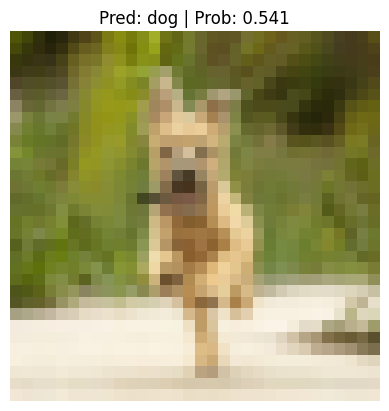

In [58]:

pred_and_plot_image(model=model_2,
                    image_path=custom_image_path1,
                    class_names=classes,
                    transform=custom_image_transform,
                    device=device)

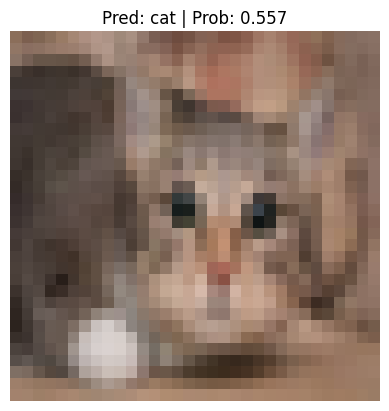

In [59]:

pred_and_plot_image(model=model_2,
                    image_path=custom_image_path2,
                    class_names=classes,
                    transform=custom_image_transform,
                    device=device)